AirBnB Vancouver - CRISP-DM Model 

Using the CRISP-DM, the Vancouver AirBnB data set is collected, cleaned, and engineered in order to answer three questions: 

    1. How does price vary by date and neighbourhood?
    2. How are review scores related to the price?
    3. What are the most important features/ameninities that affect price?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
#the review data
df_reviews = pd.read_csv('./data/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10080,720466,2011-11-15,143771,Anthony,this accommodation was excellent. beautiful sp...
1,10080,786114,2011-12-14,1472653,Nilesh,The host canceled my reservation 13 days befor...
2,10080,989885,2012-03-12,1433564,Avril,"This apartment is fantastic, just what I and m..."
3,10080,1419559,2012-06-05,725806,Dennis,Very nice apartment and great view. Close to S...
4,10080,3354964,2013-01-15,3641867,Jude,Both Rami and Mauricio made our family of 5 fe...


In [3]:
df_reviews.shape

(135634, 6)

In [4]:
#the listings data
df_listings = pd.read_csv('./data/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20180908060733,2018-09-08,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, I can add up to 2 twin s...","Stunning two bedroom, two bathroom apartment. ...",none,NaN,1. CHECK-IN TIME IS AFTER 3PM PST AND CHECK-OU...,NaN,There is no access to the building ammenities.,NaN,1. CHECK-IN TIME IS AFTER 3 PM PST AND CHECK-O...,NaN,NaN,https://a0.muscache.com/im/pictures/55778229/c...,NaN,30899,https://www.airbnb.com/users/show/30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",I will be happy to host you.,within a few hours,95%,NaN,f,https://a0.muscache.com/im/users/30899/profile...,https://a0.muscache.com/im/users/30899/profile...,Coal Harbour,28,28,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Vancouver, BC, Canada",Coal Harbour,Downtown,NaN,Vancouver,BC,V6E 2P4,Vancouver,"Vancouver, Canada",CA,Canada,49.287716,-123.121103,t,Condominium,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",1200.0,$295.00,NaN,"$4,750.00",NaN,$125.00,1,$0.00,60,1124,2 weeks ago,t,30,60,90,365,2018-09-08,16,2011-11-15,2017-02-26,93.0,9.0,9.0,10.0,9.0,10.0,9.0,t,18-476608,NaN,f,f,strict_14_with_grace_period,f,f,28,0.19
1,11400,https://www.airbnb.com/rooms/11400,20180908060733,2018-09-08,Central Lovely Rm in Victorian Home,Well-appointed room with a view of the garden ...,"Centrally-located lovely, quiet home on tree-l...",Well-appointed room with a view of the garden ...,none,"Very quiet residential area, yet only 1-1/2 bl...",NaN,Bus stop 1-1/2 blocks away. 15 minutes to down...,Access to my home and garden. Shared bathroom....,I live here so will interact with the guest wh...,"-No smoking indoors. -Recycling, composting ...",NaN,NaN,https://a0.muscache.com/im/pictures/74189163/a...,NaN,42305,https://www.airbnb.com/users/show/42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada","I am a self-employed graphic designer, AutoCAD...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/42305/profile...,https://a0.muscache.com/im/users/42305/profile...,Riley Park,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Vancouver, BC, Canada",Riley Park,Riley Park,NaN,Vancouver,BC,V5Y,Vancouver,"Vancouver, Canada",CA,Canada,49.253756,-123.112659,t,House,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",0.0,$60.00,$385.00,"$1,400.00",NaN,NaN,1,$0.00,364,364,5 months ago,t,30,60,90,365,2018-09-08,70,2010-02-18,2016-06-14,92.0,9.0,10.0,10.0,10.

In [5]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
df_listings.shape

(4273, 96)

There are 4273 listings, and 96 features

In [7]:
#neighbourhood data
df_nghbrhds = pd.read_csv('./data/neighbourhoods.csv')
df_nghbrhds.head(10)

,neighbourhood_group,neighbourhood
0,NaN,Arbutus Ridge
1,NaN,Downtown
2,NaN,Downtown Eastside
3,NaN,Dunbar Southlands
4,NaN,Fairview
5,NaN,Grandview-Woodland
6,NaN,Hastings-Sunrise
7,NaN,Kensington-Cedar Cottage
8,NaN,Kerrisdale
9,NaN,Killarney


In [8]:
#booking data
df_cal = pd.read_csv('./data/calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,10080,2019-06-28,t,$295.00
1,10080,2019-06-27,t,$295.00
2,10080,2019-06-26,t,$295.00
3,10080,2019-06-25,t,$295.00
4,10080,2019-06-24,t,$295.00


In [9]:
df_cal.shape

(1559645, 4)

First, look at how the price is distributed

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Price')]

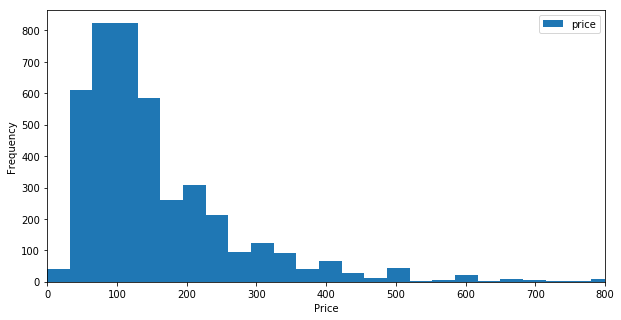

In [10]:
#clean the dollar signs from the listing prices
df_listings_price = df_listings[['price']].replace('[\$,]','',regex=True).astype(float)

ax = df_listings_price.plot.hist(bins=200, xlim=(0,800), figsize=(10,5))
ax.set(xlabel="Price", ylabel="Frequency")

The price distribution is right-skewed. Most listings are in the range of $\$$50 to $\$$150.

# 1. How does price vary by date and neighbourhood?

In order to examine the price variability by data, we will look at the calendar data

In [11]:
#clean the calendar data up
df_cal['date'] = pd.to_datetime(df_cal['date'])
df_cal[['price']] = df_cal[['price']].replace('[\$,]','',regex=True).astype(float)
df_cal = df_cal.dropna()

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Date')]

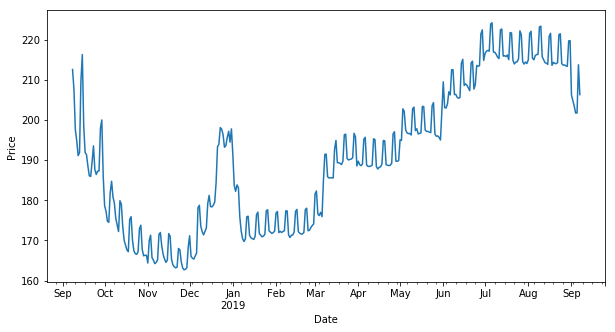

In [12]:
price_df = df_cal.groupby(['date'])['price'].mean()
ax = price_df.resample('D').mean().plot(figsize=(10,5))
ax.set(xlabel="Date", ylabel="Price")

Noteables: is the seasonal fluctuation, christmas holiday increase, and weekend increases 

To analyze how price varies by neighbourhood, we will use the listings data

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Neighbourhood')]

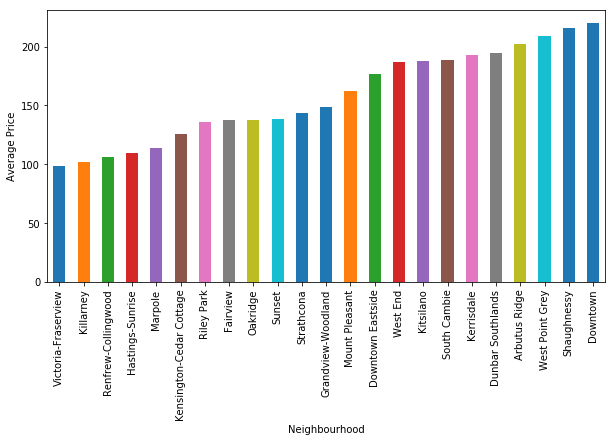

In [13]:
df_listings[['price']] = df_listings[['price']].replace('[\$,]','',regex=True).astype(float)

price_df = df_listings.groupby(['neighbourhood_cleansed'])['price'].mean()
ax = price_df.sort_values().plot.bar(sort_columns=True, figsize=(10,5))
ax.set(xlabel="Neighbourhood", ylabel="Average Price")

[Text(0, 0.5, 'Latitude'), Text(0.5, 0, 'Longitude')]

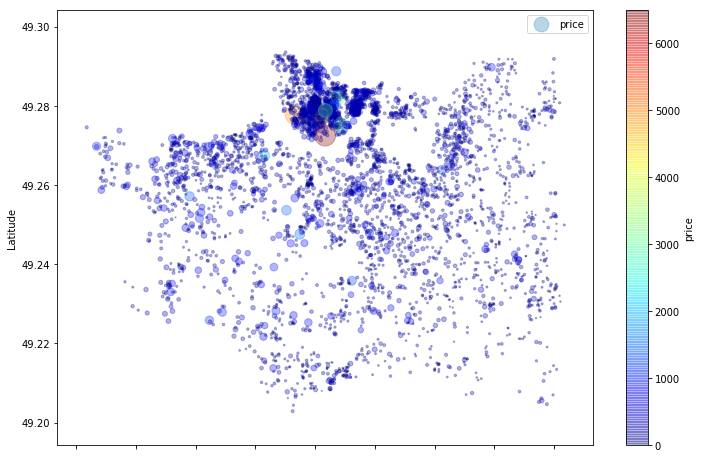

In [14]:
#Plot price on their corresponding longitude and latitude
ax = df_listings.plot.scatter(x="longitude", y="latitude", alpha=0.3, s=df_listings["price"]/15, label="price", 
                                figsize=(12,8), c="price", cmap=plt.get_cmap("jet"), colorbar=True)
ax.set(xlabel="Longitude", ylabel="Latitude")

We see that the downtown, and the neighbourhoods near downtown, have the highest prices. Also, downtown has the highest density of listings

# 2. How are review scores and price related?

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Review Scores')]

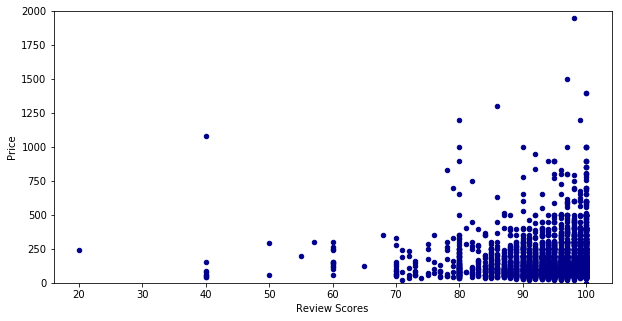

In [15]:
#plot review score ratings vs price
ax = df_listings.plot.scatter(x='review_scores_rating', y='price', color='DarkBlue',ylim=(0,2000),figsize=(10,5));
ax.set(xlabel="Review Scores", ylabel="Price")

We see that there is no certainty that a high review score means a high price, though we do see that for all but one instance, all listings above $500 earn ratings greater than 80%

# 3. What are the most important features/ameninities that affect price?

Keep only columns that could be relevant to price. I assume these to be mainly features the potential customer would be interested in.

In [16]:
cols_to_keep = [ 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
             'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'city', 'neighbourhood_group_cleansed', 
             'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 
             'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 
             'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
             'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', 
              'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'requires_license',
             'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
             'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']
df_listings_reduced = df_listings[cols_to_keep]

In [17]:
# a look into the missing data
missing = pd.DataFrame(df_listings_reduced.isnull().sum()/df_listings_reduced.shape[0]*100, columns = ["missing (%)"])
#take only columns with missing data and sort
missing = missing[missing["missing (%)"]>0.0]
missing = missing.sort_values("missing (%)", ascending = False)
missing

,missing (%)
host_acceptance_rate,100.000000
neighbourhood_group_cleansed,100.000000
square_feet,98.151182
weekly_price,87.081676
monthly_price,86.098760
security_deposit,17.458460
review_scores_value,14.556518
review_scores_checkin,14.556518
review_scores_communication,14.533115
review_scores_accuracy,14.509712


First we will drop columns that have more than 80% of the data missing. 

In [18]:
to_drop = ['neighbourhood_group_cleansed','host_acceptance_rate','square_feet','weekly_price','monthly_price']
df_listings_reduced.drop(to_drop,axis=1,inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
df_listings_reduced.shape

(4273, 39)

In [20]:
#look at data types
df_listings_reduced.dtypes

host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_identity_verified               object
neighbourhood_cleansed               object
city                                 object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                               float64
security_deposit                     object
cleaning_fee                         object
guests_included                       int64
extra_people                         object
minimum_nights                        int64
maximum_nights                  

Separate out numeric columns and fill missing entries with the mean

In [21]:
# assign numeric features to separate dataframe 
numeric_df = df_listings_reduced.select_dtypes(exclude=['O']) 
numeric_df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,calculated_host_listings_count,reviews_per_month
0,49.287716,-123.121103,6,2.0,2.0,4.0,295.0,1,60,1124,365,16,93.0,9.0,9.0,10.0,9.0,9.0,28,0.19
1,49.253756,-123.112659,1,1.0,1.0,1.0,60.0,1,364,364,365,70,92.0,9.0,10.0,10.0,10.0,9.0,1,0.67
2,49.245770,-123.105158,4,1.0,0.0,2.0,110.0,2,2,1125,269,147,96.0,10.0,10.0,10.0,10.0,10.0,1,1.41
3,49.249739,-123.081077,4,1.0,1.0,2.0,139.0,2,2,60,0,31,95.0,10.0,9.0,10.0,9.0,9.0,1,0.32
4,49.279492,-123.088748,2,1.0,1.0,1.0,100.0,2,3,365,247,241,94.0,10.0,10.0,10.0,9.0,9.0,3,2.31


Replace missing values with the median

In [22]:
numeric_df.fillna(numeric_df.median(), inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
#create separate dataframe for object datatypes
object_df = df_listings_reduced.select_dtypes(include=['O'])
object_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,city,property_type,room_type,bed_type,amenities,security_deposit,cleaning_fee,extra_people,has_availability,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,95%,f,t,Downtown,Vancouver,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",NaN,$125.00,$0.00,t,t,f,strict_14_with_grace_period,f,f
1,NaN,NaN,f,t,Riley Park,Vancouver,House,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",NaN,NaN,$0.00,t,t,f,strict_14_with_grace_period,t,t
2,within an hour,100%,f,t,Riley Park,Vancouver,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",NaN,$40.00,$0.00,t,t,f,moderate,f,f
3,within a few hours,100%,f,f,Kensington-Cedar Cottage,Vancouver,House,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Pets allowed"",""Free...",$0.00,$60.00,$15.00,t,t,f,strict_14_with_grace_period,f,f
4,within an hour,86%,t,t,Downtown Eastside,Vancouver,Guest suite,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",NaN,$60.00,$25.00,t,t,t,moderate,f,f


In [24]:
# clean up the boolean columns by replace t and f, with True and False

bool_cols = ['host_is_superhost', 'host_identity_verified', 'has_availability', 'requires_license','instant_bookable',
               'require_guest_profile_picture','require_guest_phone_verification']

for col in bool_cols:
    object_df[col] = object_df[col].map(lambda x: True if x == "t" else False)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


We will now clean up the amenities column by removing unnecessary chars and splitting them into separate columns while encoding them

In [25]:
# removing unnecessary characters from amenities
amenities = np.array(object_df['amenities'].map(lambda amns: amns.replace('"',"").replace('{',"").replace('}',"").split(',')))
# Create an array of all unique amenities
all_amenities = np.unique(np.concatenate(amenities))[1:]

In [26]:
def available_amenties(all_amenities, amenities):
    amenties_bool = np.empty((amenities.shape[0], all_amenities.shape[0]))
    for i, row in enumerate(amenities):
        amns = all_amenities.copy()
        for j, amn in enumerate(amns):
            if amn in amenities[i]:
                amenties_bool[i,j] = True
            else:
                amenties_bool[i,j] = False
    return amenties_bool

amenities = available_amenties(all_amenities, amenities)

In [27]:
# Reset index of the train data frame and drop the old index
numeric_df = numeric_df.reset_index(drop=True)

In [28]:
# Combine the train data frame and the amenities data frame
df_listings_cleaned = pd.concat([numeric_df, pd.DataFrame(data=amenities, columns=all_amenities)], axis=1)

In [29]:
object_df.drop(['amenities'],axis=1,inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
#clean the percentage and dollar values
# object_df[['price']] = object_df[['price']].replace('[\$,]','',regex=True).astype(float)
object_df[['security_deposit']] = object_df[['security_deposit']].replace('[\$,]','',regex=True).astype(float)
object_df[['cleaning_fee']] = object_df[['cleaning_fee']].replace('[\$,]','',regex=True).astype(float)
object_df[['extra_people']] = object_df[['extra_people']].replace('[\$,]','',regex=True).astype(float)
object_df[['host_response_rate']] = object_df[['host_response_rate']].replace('[\%,]','',regex=True).astype(float)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [31]:
object_df.isnull().sum()/object_df.shape[0]

host_response_time                  0.064358
host_response_rate                  0.064358
host_is_superhost                   0.000000
host_identity_verified              0.000000
neighbourhood_cleansed              0.000000
city                                0.000000
property_type                       0.000000
room_type                           0.000000
bed_type                            0.000000
security_deposit                    0.174585
cleaning_fee                        0.089165
extra_people                        0.000000
has_availability                    0.000000
requires_license                    0.000000
instant_bookable                    0.000000
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
dtype: float64

In [32]:
#fill missing values with the mean
object_df.fillna(object_df.mean(), inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
# Getting dummy variables of categorical features
categorical_columns = ['host_response_time','city','neighbourhood_cleansed', 'property_type', 
                       'room_type', 'bed_type','cancellation_policy']
object_df = pd.get_dummies(object_df,columns=categorical_columns)

In [34]:
object_df.head()

,host_response_rate,host_is_superhost,host_identity_verified,security_deposit,cleaning_fee,extra_people,has_availability,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,city_BC,city_Burnaby,city_Coquitlam,city_Crosstown Vancouver,city_North Vancouver,city_Richmond,city_Vancouver,city_Vancouver,city_Vancouver bc,city_vancouver,city_温哥华,neighbourhood_cleansed_Arbutus Ridge,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_Downtown Eastside,neighbourhood_cleansed_Dunbar Southlands,neighbourhood_cleansed_Fairview,neighbourhood_cleansed_Grandview-Woodland,neighbourhood_cleansed_Hastings-Sunrise,neighbourhood_cleansed_Kensington-Cedar Cottage,neighbourhood_cleansed_Kerrisdale,neighbourhood_cleansed_Killarney,neighbourhood_cleansed_Kitsilano,neighbourhood_cleansed_Marpole,neighbourhood_cleansed_Mount Pleasant,neighbourhood_cleansed_Oakridge,neighbourhood_cleansed_Renfrew-Collingwood,neighbourhood_cleansed_Riley Park,neighbourhood_cleansed_Shaughnessy,neighbourhood_cleansed_South Cambie,neighbourhood_cleansed_Strathcona,neighbourhood_cleansed_Sunset,neighbourhood_cleansed_Victoria-Fraserview,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Point Grey,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30
0,95.000000,False,True,387.642756,125.00000,0.0,True,True,False,False,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,96.788644,False,True,387.642756,79.02518,0.0,True,True,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,100.000000,False,True,387.642756,40.00000,0.0,True,True,False,False,False,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,100.000000,False,False,0.000000,60.00000,15.0,True,True,False,False,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,86.000000,True,True,387.642756,60.00000,25.0,True,True,True,False,False,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [35]:
df_listings_clean = pd.concat([df_listings_cleaned,object_df],axis=1)

In [36]:
df_listings_clean.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,calculated_host_listings_count,reviews_per_month,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Bathtub with bath chair,Beach essentials,Beachfront,Bed linens,Breakfast,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to front door,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Handheld shower head,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Keypad,Kitchen,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Other,Other pet(s),Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Self check-in,Shampoo,Shower chair,Single level home,Ski-in/Ski-out,Smart lock,Smoke detector,Smoking allowed,Stair gates,Step-free access,Stove,Suitable for events,TV,Table corner guards,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower,Wide doorway,Wide entryway,Wide hallway clearance,Wifi,Window guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,host_response_rate,host_is_superhost,host_identity_verified,security_deposit,cleaning_fee,extra_people,has_availability,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,city_BC,city_Burnaby,city_Coquitlam,city_Crosstown Vancouver,city_North Vancouver,city_Richmond,city_Vancouver,city_Vancouver,city_Vancouver bc,city_vancouver,city_温哥华,neighbourhood_cleansed_Arbutus Ridge,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_Downtown Eastside,neighbourhood_cleansed_Dunbar Southlands,neighbourhood_cleansed_Fairview,neighbourhood_cleansed_Grandview-Woodland,neighbourhood_cleansed_Hastings-Sunrise,neighbourhood_cleansed_Kensington-Cedar Cottage,neighbourhood_cleansed_Kerrisdale,neighbourhood_cleansed_Killarney,neighbourhood_cleansed_Kitsilano,neighbourhood_cleansed_Marpole,neighbourhood_cleansed_Mount Pleasant,neighbourhood_cleansed_Oakridge,neighbourhood_cleansed_Renfrew-Collingwood,neighbourhood_cleansed_Riley Park,neighbourhood_cleansed_Shaughnessy,neighbourhood_cleansed_South Cambie,neighbourhood_cleansed_Strathcona,neighbourhood_cleansed_Sunset,neighbourhood_cleansed_Victoria-Fraserview,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Point Grey,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,prope

The data is now considered clean and we can proceed with analysis

In [37]:
#assign features and predictor (price)
X = df_listings_clean.drop(columns=['price'])
y = df_listings_clean['price']

In [38]:
#scale the features to mean 0 and std dev 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [39]:
#split the data into a training and test set. I chose a test size of 33% of the data.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=34)

In [40]:
#First, try a decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=34)
dt_model.fit(X_train, y_train)

#predict
dt_preds = dt_model.predict(X_train)

#get mean squared error
dt_mse = mean_squared_error(y_train, dt_preds)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.0

In [41]:
#Now try a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=34)
rf_model.fit(X_train, y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\basemaps\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=34, verbose=0, warm_start=False)

In [42]:
#predict and get mean squared error
rf_preds = rf_model.predict(X_train)
rf_mse = mean_squared_error(y_train, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

61.15398079908717

The decision tree appears to overfit so we will use the random forest regressor for the remainder of the analysis

In [71]:
#perform a grid search to determmine the best parameters.
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 5, 10, 13, 15, 20, 30,35,40,60], 'max_features': [2, 4, 6, 8, 10,12,14]},
  ]

rf_model = RandomForestRegressor(random_state=34)

grid_search = GridSearchCV(rf_model, param_grid, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=34, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 5, 10, 13, 15, 20, 30, 35, 40, 60], 'max_features': [2, 4, 6, 8, 10, 12, 14]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [72]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 40}

In [73]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=34,
           verbose=0, warm_start=False)

In [74]:
#take the best model and calculate the RMSE
best_model = grid_search.best_estimator_
price_preds = best_model.predict(X_test)

final_mse = mean_squared_error(y_test, price_preds)
final_rmse = np.sqrt(final_mse)
final_rmse

215.1232749502455

In [75]:
#important attributes from our model
imp_features = best_model.feature_importances_
attributes = df_listings_clean.drop(columns=['price']).columns
features = sorted(zip(imp_features, attributes), reverse=True)

In [76]:
#list of all attributes and their coefficient
att = []
coeff = []
for feature in features:
    att.append(feature[1]) 
    coeff.append(feature[0])

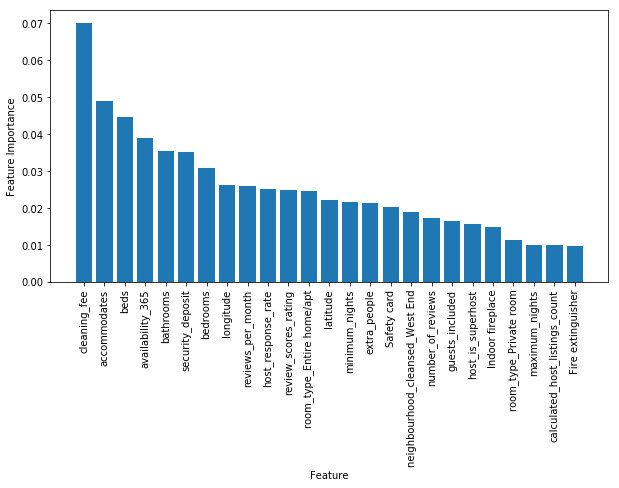

In [80]:
#plot top 25 important features
plt.figure(figsize=(10,5))
plt.bar(att[:25], height=coeff[:25])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

In [78]:
#Create list of all amenities and their coefficients
amenity= []
amn_coef = []
for feature in features:
    if feature[1] in all_amenities:
        amenity.append(feature[1])
        amn_coef.append(feature[0])


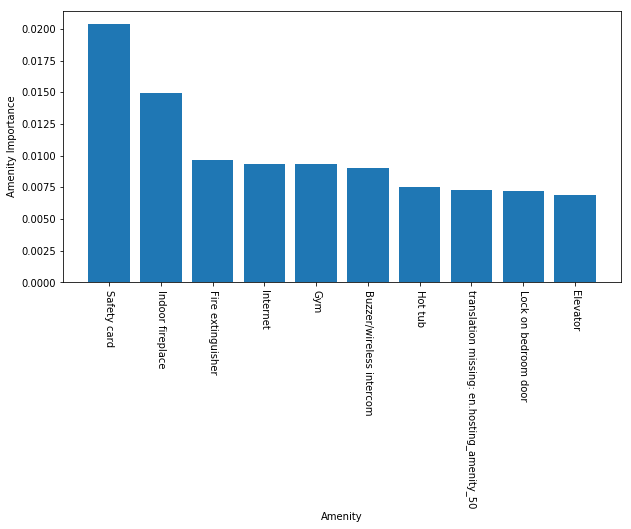

In [81]:
#Plot 10 most important amenities
plt.figure(figsize=(10,5))
plt.bar(amenity[:10], height=amn_coef[:10])
plt.xticks(rotation=-90)
plt.xlabel('Amenity')
plt.ylabel('Amenity Importance')
plt.show()

# Summary:

We see that features such as accommodates, bedrooms, bathrooms, beds, and guests_included are important features for determining the price of an AirBnB. Usually, the more bedrooms, bathrooms, and guests, the higher the cost.

Amongst ameninites, we  see that safety cards and indoor fireplaces were important in determining price. It also appears that internet, a gym, and a hot tub have an affect on price